In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
X = data.drop(columns='target')
Y = data['target']


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

In [7]:
print(X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
835   49    1   2       118   149    0        0      126      0      0.8   
137   64    0   0       180   325    0        1      154      1      0.0   
534   54    0   2       108   267    0        0      167      0      0.0   
495   59    1   0       135   234    0        1      161      0      0.5   
244   51    1   2       125   245    1        0      166      0      2.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
700   41    1   2       130   214    0        0      168      0      2.0   
71    61    1   0       140   207    0        0      138      1      1.9   
106   51    1   0       140   299    0        1      173      1      1.6   
270   43    1   0       110   211    0        1      161      0      0.0   
860   52    1   0       112   230    0        1      160      0      0.0   

     slope  ca  thal  
835      2   3     2  
137      2   0     2  
534      2   0    

In [8]:
print(Y_train)

835    0
137    1
534    1
495    1
244    1
      ..
700    1
71     0
106    0
270    1
860    0
Name: target, Length: 820, dtype: int64


In [9]:
X_train = X_train.values
X_test = X_test.values

Y_train = Y_train.values
Y_test = Y_test.values

In [10]:
Y_train = Y_train.reshape(X_train.shape[0], 1)
Y_test = Y_test.reshape(X_test.shape[0], 1)

In [11]:
print(X_train.shape) 
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(820, 13)
(820, 1)
(205, 13)
(205, 1)


In [12]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [13]:
def model(X, Y, learning_rate, iterations):
    m = X.shape[1]  
    n = X.shape[0]  
    
    W = np.zeros((m, 1))  
    B = 0
    
    cost_list = []
    
    for i in range(iterations):
        Z = np.dot(X, W) + B  
        A = sigmoid(Z)
        
        cost = -(1/n) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
        
        dW = (1/n) * np.dot(X.T, (A - Y)) 
        dB = (1/n) * np.sum(A - Y)
        
        W = W - learning_rate * dW
        B = B - learning_rate * dB
        
        cost_list.append(cost)
        
        if i % (iterations // 10) == 0:
            print("Cost after", i, "iterations is:", cost)
        
    return W, B, cost_list

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [15]:
iterations = 10000
learning_rate = 0.001
W, B, cost_list = model(X_train_scaled, Y_train, learning_rate = learning_rate, iterations = iterations)

Cost after 0 iterations is: 0.6931471805599453
Cost after 1000 iterations is: 0.5007063658465739
Cost after 2000 iterations is: 0.43275716090327465
Cost after 3000 iterations is: 0.4003824384820744
Cost after 4000 iterations is: 0.3818736311775006
Cost after 5000 iterations is: 0.37004089724304934
Cost after 6000 iterations is: 0.3618963450946069
Cost after 7000 iterations is: 0.3559915556413908
Cost after 8000 iterations is: 0.3515434978287954
Cost after 9000 iterations is: 0.34809325654459156


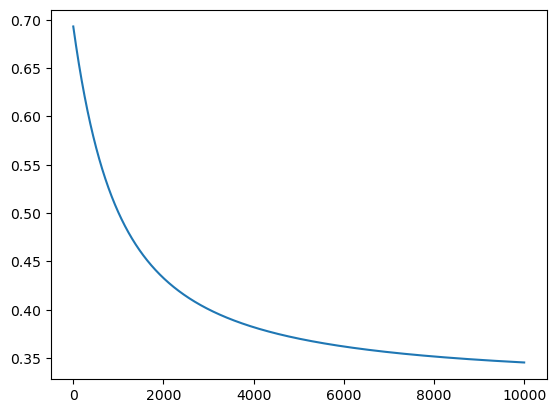

In [16]:
plt.plot(np.arange(iterations), cost_list)
plt.show()

In [17]:
def predict(X, W, B):
    Z = np.dot(X, W) + B
    A = sigmoid(Z)
    return (A > 0.5).astype(int)

In [27]:
X_test_scaled = scaler.transform(X_test)

In [28]:
Y_pred = predict(X_test_scaled, W, B)

In [29]:
def accuracy(Y_pred, Y_test):
    acc = (np.sum(Y_pred == Y_test) / Y_test.size) * 100
    print("Accuracy of the model is:", round(acc, 2), "%")

In [30]:
accuracy(Y_pred, Y_test)

Accuracy of the model is: 79.51 %


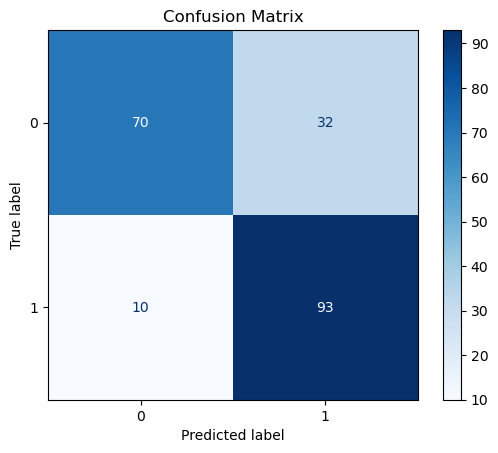

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, Y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()